In [5]:
import xarray as xr
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
dir='/nobackupp27/dmenemen/public/geos_ecco/c1440_llc2160/holding/'
odir='/nobackupp27/afahad/project/subgrid_tenden/data/'
os.chdir(odir)
dfiles=sorted(glob('dQV_*.nc4'))
files=sorted(glob('C90QV_*.nc4'))

In [7]:
dir='/nobackupp27/dmenemen/public/geos_ecco/c1440_llc2160/holding/inst_01hr_3d_QV_Mv/'

In [8]:
# create Hres dprdt

for i in tqdm(range(len(files))):
            ds1=xr.open_dataset(files[i])#.QV#.sel(lev=int(l))
            ds2=xr.open_dataset(files[i+1])#.QV.sel(lev=int(l))
            dQV=ds2.QV.data-ds1.QV
            HdQV=xr.open_dataset('dQV'+files[i][5:])
            sub=HdQV.dQV-dQV
            Qtrain=xr.merge([sub.rename('subQV'),dQV.rename('dQV'),ds1.QV])
            cc=xr.open_mfdataset(dir+files[i][6:])
            Qtrain.coords.update(cc.coords)
            os.system('rm -rf '+odir+'Qtrain_'+files[i])
            Qtrain.to_netcdf(odir+'Qtrain_'+files[i])
    

100%|██████████████████████████████████████████████████████████████▉| 1711/1712 [07:37<00:00,  3.74it/s]


IndexError: list index out of range

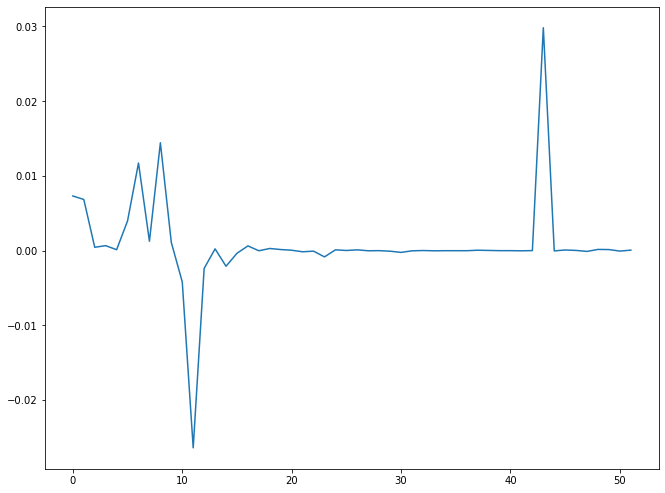

In [89]:
plt.figure(figsize=(11,8.5))
plt.plot(sub.sum(dim=['time','face','y','x'])*100/(dQV.sum(dim=['time','face','y','x'])))


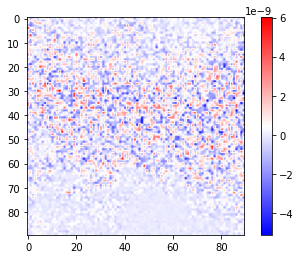

In [111]:
plt.imshow(Qtrain.subQV[0,-1,1,:,:],cmap='bwr')
plt.colorbar()

Text(0.5, 1.0, 'C1440 dQvdt')

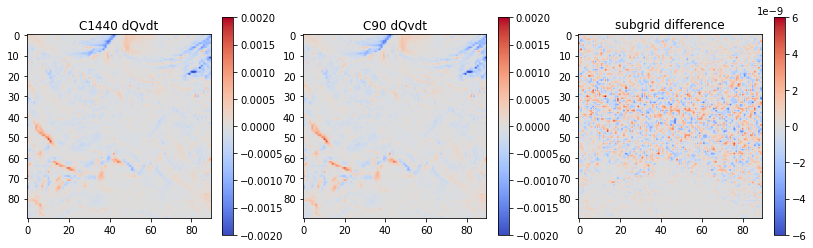

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,3)
clf=np.arange(-.1,.11,.025)*1e-2
vmax=.6*1e-8
vmin=-.6*1e-8
plt.imshow(sub[0,-1,1,:,:],cmap='coolwarm',vmax=vmax, vmin=vmin)
plt.colorbar()
plt.title('subgrid difference')

vmax=.2*1e-2
vmin=-.2*1e-2

plt.subplot(1,3,2)
clf=np.arange(-.1,.11,.025)*1e-2
plt.imshow(dQV[0,-1,1,:,:],cmap='coolwarm',vmax=vmax, vmin=vmin)
plt.colorbar()
plt.title('C90 dQvdt')

plt.subplot(1,3,1)
clf=np.arange(-.1,.11,.025)*1e-2
plt.imshow(HdQV.dQV[0,-1,1,:,:],cmap='coolwarm',vmax=vmax, vmin=vmin)
plt.colorbar()
plt.title('C1440 dQvdt')



Text(0.5, 1.0, 'C1440 dQvdt')

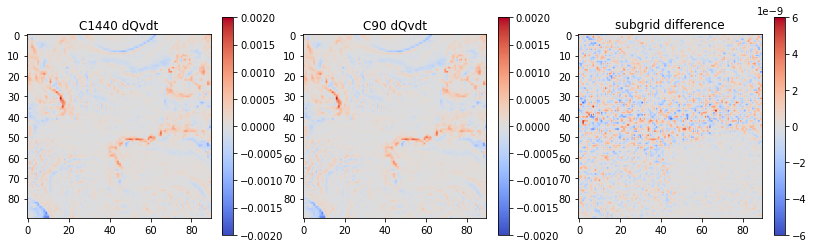

In [92]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,3)
clf=np.arange(-.1,.11,.025)*1e-2
vmax=.6*1e-8
vmin=-.6*1e-8
plt.imshow(sub[0,-1,0,:,:],cmap='coolwarm',vmax=vmax, vmin=vmin)
plt.colorbar()
plt.title('subgrid difference')

vmax=.2*1e-2
vmin=-.2*1e-2

plt.subplot(1,3,2)
clf=np.arange(-.1,.11,.025)*1e-2
plt.imshow(dQV[0,-1,0,:,:],cmap='coolwarm',vmax=vmax, vmin=vmin)
plt.colorbar()
plt.title('C90 dQvdt')

plt.subplot(1,3,1)
clf=np.arange(-.1,.11,.025)*1e-2
plt.imshow(HdQV.dQV[0,-1,0,:,:],cmap='coolwarm',vmax=vmax, vmin=vmin)
plt.colorbar()
plt.title('C1440 dQvdt')

